In [7]:
%matplotlib inline

import numpy as np
from scipy.io import loadmat, savemat

from fooof import FOOOFGroup

In [8]:
# Load the mat file 
data = loadmat('PSD.mat')

# Unpack data from dictionary, and squeeze numpy arrays
freqs = np.squeeze(data['f']).astype('float')
psds = np.squeeze(data['PSD_all']).astype('float')
# ^Note: this also explicitly enforces type as float (type casts to float64, instead of float32)
#  This is not strictly necessary for fitting, but is for saving out as json from FOOOF, if you want to do that

# Transpose power spectra, to have the expected orientation for FOOOF
psds = psds.T  

In [9]:
# Initialize FOOOFGroup object
fg = FOOOFGroup()

Running FOOOFGroup across 50 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.47 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 50                             
                                                                                                  
                        The model was run on the frequency range 1 - 10 Hz                        
          

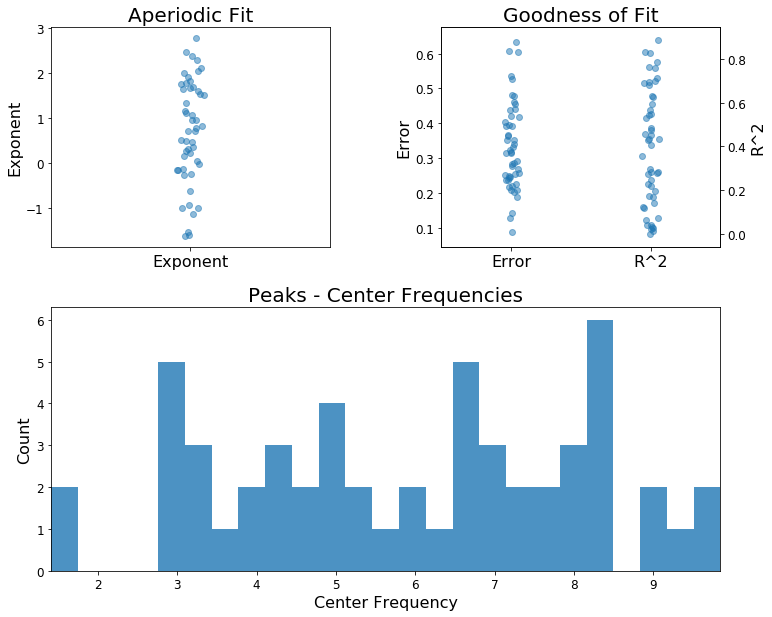

In [10]:
# Fit the FOOOF model on all PSDs, and report
fg.report(freqs, psds, [1, 10])

In [11]:
# # Save out a specific FOOOF measure of interest - for example, slopes
# exps = fg.get_params('aperiodic_params', 'exponent')
# savemat('exps.mat', {'exps' : exps})
# # Save out fooof results to json file
# #  There is a utility file to load this json file directly into Matlab
# fg.save('fooof_results', save_results=True)
# # Alternatively: save out full FOOOFresults for each PSD fit separately to mat files
# #  This might be useful if you are using Matlab < r2016B, and don't have json support
# for ind, f_res in enumerate(fg):
#     savemat('f_results_' + str(ind) + '.mat', f_res._asdict())